## Data Loading (Saved, Don't have to run)

updates
- punctuation not include %
- split based on r' |\[|\]|\(|\)|,|!|\"|#|\$|\*|:|;|\?|'
- don't use is.alpha / is.numeric

In [ ]:
# LOADING TRAINING DATA | LARGE
import statistics
import numbers
import numpy as np
import nltk
import string
import os
import re

import nltk
stopwords = nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# punctuation manipulation: do not include "%"
punctuation_updated = '!"#$&\'()*+,-./:;<=>?@[\\]^_`{|}~'

image_path = "/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Pediatrics Figures/Multilabel Output Large New/"
train_path = "/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Benjamin Liu/Pediatrics/output/train/"
categories = ['pedia', 'lactation', 'nursing', 'pregnancy','geriatric']

X_train = []
y_train = []

for index, cat in enumerate(categories):
  # ------- for every cat ------- 
  X_train_cat = []
  print("Length of " + cat + " is: " + str(len(os.listdir(train_path + cat))))
  for file_idx, filename in enumerate(os.listdir(train_path + cat)):
    # FOR ONE PARAGRAPH
    if (file_idx % 100 == 0):
      print("Pre-processing " + cat + " " + str(file_idx))
    fp = open(train_path + cat + "/" + filename)
    s = fp.read()
    fp.close()
    lines = s.split("\n")
    #print(lines)
    
    # ------- tokenize and data cleaning by cat -----
    if cat == "pedia":
      # tokenize and data cleaning
      for i in range(len(lines)):
        # remove "pediatric use"
        if any(elmt in lines[i][:20] for elmt in ["Pediatric Use", "pediatric Use"]):
          lines[i] = lines[i][lines[i].index('Use') + 3 :]
        if any(elmt in lines[i][:20] for elmt in ["Pediatric use", "pediatric use"]):
          lines[i] = lines[i][lines[i].index('use') + 3 :]
        if lines[i] == "8.4":
          lines[i] = " "
        # tokenize 
        lines[i] = [word.strip(string.punctuation) for word in re.split(' |\[|\]|\(|\)|,|!|\"|#|\$|\*|:|;|\?|', lines[i])]
        lines[i] = [word.lower() for word in lines[i]] # normalize
      two_d_list = lines
    if cat == "geriatrics":
      # tokenize and data cleaning
      for i in range(len(lines)):
        # remove "geriatric use"
        if any(elmt in lines[i][:20] for elmt in ["Geriatric Use", "geriatric Use"]):
          lines[i] = lines[i][lines[i].index('Use') + 3 :]
        if any(elmt in lines[i][:20] for elmt in ["Geriatric use", "geriatric use"]):
          lines[i] = lines[i][lines[i].index('use') + 3 :]
        if lines[i] == "8.5":
          lines[i] = " "
        # tokenize 
        lines[i] = [word.strip(string.punctuation) for word in re.split(' |\[|\]|\(|\)|,|!|\"|#|\$|\*|:|;|\?|', lines[i])]
        lines[i] = [word.lower() for word in lines[i]] # normalize
      two_d_list = lines
    elif cat == "lactation":
      # tokenize and data cleaning
      for i in range(len(lines)):
        # remove "lactation"
        if any(elmt in lines[i][:20] for elmt in ["lactation"]):
          lines[i] = lines[i][lines[i].index('lactation') + 9 :]
        if any(elmt in lines[i][:20] for elmt in ["Lactation"]):
          lines[i] = lines[i][lines[i].index('Lactation') + 9 :]
        if any(elmt in lines[i][:20] for elmt in ["Risk Summary", "risk Summary"]):
          lines[i] = lines[i][lines[i].index('Summary') + 7 :]
        if any(elmt in lines[i][:20] for elmt in ["Risk summary", "risk summary"]):
          lines[i] = lines[i][lines[i].index('summary') + 7 :]
        if lines[i] == "8.2":
          lines[i] = " "
        # tokenize 
        lines[i] = [word.strip(string.punctuation) for word in re.split(' |\[|\]|\(|\)|,|!|\"|#|\$|\*|:|;|\?|', lines[i])]
        lines[i] = [word.lower() for word in lines[i]] # normalize
      two_d_list = lines
    elif cat == "nonpedia":
      # tokenize and data cleaning
      for i in range(len(lines)):
        # tokenize 
        lines[i] = [word.strip(string.punctuation) for word in re.split(' |\[|\]|\(|\)|,|!|\"|#|\$|\*|:|;|\?|', lines[i])]
        lines[i] = [word.lower() for word in lines[i]] # normalize
      two_d_list = lines
    elif cat == "nursing":
      # tokenize and data cleaning
      for i in range(len(lines)):
        # remove "pediatric use"
        if any(elmt in lines[i][:21] for elmt in ["Nursing Mothers", "nursing Mothers"]):
          lines[i] = lines[i][lines[i].index('Mother') + 6 :]
        if any(elmt in lines[i][:21] for elmt in ["Nursing mothers", "nursing mothers"]):
          lines[i] = lines[i][lines[i].index('mother') + 6 :]
        if any(elmt in lines[i][:50] for elmt in ["Females and Males of Reproductive Potential"]):
          lines[i] = lines[i][lines[i].index('Potential') + 9 :]
        if lines[i] == "8.3":
          lines[i] = " "
        # tokenize
        lines[i] = [word.strip(string.punctuation) for word in re.split(' |\[|\]|\(|\)|,|!|\"|#|\$|\*|:|;|\?|', lines[i])]
        lines[i] = [word.lower() for word in lines[i]] # normalize
      two_d_list = lines
    elif cat == "pregnancy":
      # tokenize and data cleaning
      for i in range(len(lines)):
        # remove "pediatric use"
        if any(elmt in lines[i][:20] for elmt in ["Pregnancy"]):
          lines[i] = lines[i][lines[i].index('Pregnancy') + 9 :]
        if any(elmt in lines[i][:20] for elmt in ["pregnancy"]):
          lines[i] = lines[i][lines[i].index('pregnancy') + 9 :]
        if lines[i] == "8.1":
          lines[i] = " "
        # tokenize 
        lines[i] = [word.strip(string.punctuation) for word in re.split(' |\[|\]|\(|\)|,|!|\"|#|\$|\*|:|;|\?|', lines[i])]
        lines[i] = [word.lower() for word in lines[i]] # normalize
      two_d_list = lines
    # -----------------------------------------

    one_parag_tokenized = []
    for i in range(len(two_d_list)):
      for k, elmt in enumerate(two_d_list[i]): # Traverse thru all
        if re.match('[\s\S]+\.+[a-zA-Z]', elmt): # if its something.something
          splitted_word = re.split('\.', elmt)
          two_d_list[i].remove(elmt)
          for j, wd in enumerate(splitted_word):
            two_d_list[i].insert(k+j, wd)
        
    for i in range(len(two_d_list)):
      for k in range(len(two_d_list[i])): # Traverse thru all    
        if two_d_list[i][k] != "" and two_d_list[i][k] != " ": # remove empty
          one_parag_tokenized.append(two_d_list[i][k])
    #print(one_parag_tokenized)
    X_train_cat.append(one_parag_tokenized)
  
  # remove stop words (ADDED)
  for i in range(len(X_train_cat)):
    X_train_cat[i] = [w for w in X_train_cat[i] if not w in stop_words]

  print(X_train_cat)
  print("Length of " + cat + " is: " + str(len(X_train_cat)))

  length_list = []
  for i in range(len(X_train_cat)):
      length_list.append(len(X_train_cat[i]))
  print(cat + " mean length " + str(statistics.mean(length_list)))
  print(cat + " stdev length " + str(statistics.stdev(length_list)))

  with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data New/Multi_X_train_Large_'+cat+'','wb') as f:
    np.save(f, np.array(X_train_cat), allow_pickle=True)
  # with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_X_train_Large_'+cat+'.npy', 'rb') as f:
  #   X_train_cat = np.load(f,allow_pickle=True)


  # LENGTH DISTRIBUTION
  length_list = []
  for i in range(len(X_train_cat)):
      length_list.append(len(X_train_cat[i]))
  print(length_list)

  # print('Maximum length: ' + str(max(length_list)))
  # print('Maximum length: ' + str(min(length_list)))
  # print('Median length: ' + str(statistics.median(length_list)))

  import numpy as np
  import matplotlib.mlab as mlab
  import matplotlib.pyplot as plt

  num_bins = 100
  n, bins, patches = plt.hist(length_list, num_bins, facecolor='blue', alpha=0.5)
  plt.xlabel('Length of Text (words)')
  plt.ylabel('Count')
  plt.savefig(image_path + cat + 'Len Dist Train Large.png')
  plt.show()



  #X_train = X_train + X_train_cat
  #print(X_train)

  # for i in range(len(X_train_cat)):
  #   y_train.append(index) # use "index" corresponding to "cat" as class


## Create X_train, y_train, Encoding

run with the above section or run just this

In [ ]:

import statistics
import numbers
import numpy as np
import nltk
import string
import os

# image_path = "/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Pediatrics Figures/Multilabel Output Large/"
image_path = "/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Pediatrics Figures/Multilabel Output Large New/"
# data_path = "/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Benjamin Liu/Pediatrics/output/train/"
categories = ['pedia', 'lactation', 'nursing', 'pregnancy','geriatrics'] # order cannot change!

# # declared in next section
# max_word_length_all = 90
# embedding_all = 64
# batch_all = 512

# with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_X_train_Large_token.npy', 'rb') as f:
#   X_train = np.load(f,allow_pickle=True)

X_train = []
for index, cat in enumerate(categories):
  with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data New/Multi_X_train_Large_' + cat + '.npy', 'rb') as f:
    X_train_cat = np.load(f,allow_pickle=True)
    #print(X_train_cat)
  X_train = X_train + list(X_train_cat)

with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_y_train_Large_orig.npy', 'rb') as f: # loaded from old folder

  y_train = np.load(f,allow_pickle=True)


# ------ processing y_train
import numpy as np
y_train = np.array(y_train)
print(y_train)

if (len(X_train) == len(y_train)):
    print("X_train and y_train have the same length")
else:
    print("X_train and y_train DO NOT have the same length")

from keras.utils.np_utils import to_categorical  # ADDED from kaggle
y_train = to_categorical(y_train, num_classes = 5)  # ADDED

with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data New/Multi_y_train_Large.npy','wb') as f:
    np.save(f, np.array(y_train))
# with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_y_train_Large.npy', 'rb') as f:
#   y_train = np.load(f,allow_pickle=True)


# LENGTH DISTRIBUTION
length_list = []
for i in range(len(X_train)):
    length_list.append(len(X_train[i]))
print(length_list)

print('Maximum length: ' + str(max(length_list)))
print('Minimum length: ' + str(min(length_list)))
print('Median length: ' + str(statistics.median(length_list)))

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

num_bins = 100
n, bins, patches = plt.hist(length_list, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Length of Text (words)')
plt.ylabel('Count')
plt.savefig(image_path + ' Len Dist Large.png')
plt.show()

# ---- INTEGER ENCODING ----
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
# version 2: each paragraph is a string (FOR ONE HOT ENCODING)
X_train_in_string = []
for paragraph in X_train:
  string_for_paragraph = ""
  for token in paragraph:
    string_for_paragraph = string_for_paragraph + str(token) + " "
  X_train_in_string.append(string_for_paragraph)
print(X_train_in_string[0])

corpus = X_train_in_string
vectorizer = CountVectorizer()
X_encoded = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

vocabulary = vectorizer.get_feature_names()
vocabulary_dict = { i : vocabulary[i] for i in range(0, len(vocabulary) ) }
vocabulary_size = len(vocabulary_dict)
print("vocab size: " + str(vocabulary_size))

# save vocabulary and vocab size
with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data New/Multi_Vocab_Large.npy', 'wb') as f:
  np.save(f, np.array(vocabulary),allow_pickle=True)
# with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data New/Multi_Vocab_Large.npy', 'rb') as f:
#   vocabulary = np.load(f,allow_pickle=True)
with open("/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data New/Multi_Vocabsize_Large", 'w') as f: 
  f.write(str(vocabulary_size))
# vocabulary_size = int(open("/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data New/Multi_Vocabsize_Large").read())
# print("vocab size is:" + str(vocabulary_size))

for i in range(len(X_train)):
  for j in range(len(X_train[i])):
    if X_train[i][j] in vocabulary:
      X_train[i][j] = list(vocabulary_dict.values()).index(X_train[i][j])
  X_train[i] = [p for p in X_train[i] if isinstance(p, numbers.Number)]
print(X_train[0])

with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data New/Multi_X_train_Large_idx.npy', 'wb') as f:
  np.save(f, np.array(X_train),allow_pickle=True)
# with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data New/Multi_X_train_Large_idx.npy', 'rb') as f:
#   X_train = np.load(f,allow_pickle=True)
# ---- INTEGER ENCODING ENDS ----

## CV Large Train

In [ ]:
  # ----- CROSS VALIDATION | LARGE | USING SAVED DATA -----
  import numpy as np
  import matplotlib.mlab as mlab
  import matplotlib.pyplot as plt

  max_word_length_all = 90
  embedding_all = 64
  batch_all = 512

  image_path = "/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Pediatrics Figures/Multilabel Output Large New/"

  vocabulary_size = int(open("/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data New/Multi_Vocabsize_Large").read())
  print("vocab size is: " + str(vocabulary_size))


  # with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_X_train_Large_token.npy', 'rb') as f:
  #   X_train = np.load(f,allow_pickle=True)
  # print(X_train[0])

  with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_y_train_Large.npy', 'rb') as f:
    y_train = np.load(f,allow_pickle=True)

  with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_y_train_Large_orig.npy', 'rb') as f:
    y_train_orig = np.load(f,allow_pickle=True) # just for model prediction / confusion matrix purpose

  with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data New/Multi_X_train_Large_idx.npy', 'rb') as f:
    X_train = np.load(f,allow_pickle=True)
  print(X_train[0])
  

  # =============================================================================================
  #from keras.datasets import imdb
  import statistics
  import numbers
  from keras.preprocessing.text import one_hot
  from keras.preprocessing.text import text_to_word_sequence
  import pandas as pd
  


  from keras import backend as K

  def recall_m(y_true, y_pred):
      true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
      possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
      recall = true_positives / (possible_positives + K.epsilon())
      return recall
  def precision_m(y_true, y_pred):
      true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
      predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
      precision = true_positives / (predicted_positives + K.epsilon())
      return precision
  def f1_m(y_true, y_pred):
      precision = precision_m(y_true, y_pred)
      recall = recall_m(y_true, y_pred)
      return 2*((precision*recall)/(precision+recall+K.epsilon()))


  # pad sequence
  from keras.preprocessing import sequence
  max_words = max_word_length_all #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  X_train = sequence.pad_sequences(X_train, maxlen=max_words)
  #X_train = np.array(list(x for x in X_train))
  data_size = len(X_train)
  fold_size = data_size//5

  from tensorflow.python.keras.layers import Embedding, LSTM, Dense, Dropout
  from tensorflow.python.keras import Sequential
  from sklearn import metrics


  # random
  from sklearn.utils import shuffle
  X, y, y_orig = shuffle(X_train, y_train, y_train_orig, random_state=2020)
  #print(X) # FOR DEBUGGING

  loss_array = [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0,] # 30 slots. 0-4: overall. 5-9: pedia ...
  accuracy_array = [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0,]
  f1_array = [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0,]
  precision_array = [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0,]
  recall_array =[0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0,]


  for i in range(5):
    print('----- Iteration ', i, '-----')
    X_test_cv = X[i*fold_size:i*fold_size+fold_size]
    y_test_cv = y[i*fold_size:i*fold_size+fold_size]
    y_orig_test_cv = y_orig[i*fold_size:i*fold_size+fold_size]

    X_train_cv = np.concatenate((X[0:i*fold_size], X[i*fold_size+fold_size:data_size]), axis=0)
    y_train_cv = np.concatenate((y[0:i*fold_size], y[i*fold_size+fold_size:data_size]), axis=0)


    embedding_size = embedding_all # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    model=Sequential()
    model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
    #model.add(Dense(14, input_dim=7,activation="relu"))
    #model.add(LSTM(100, input_shape = (2,10)))
    #model.add(LSTM(100))
    model.add(LSTM(100, dropout=0.5)) # deleted "stateful = False", deleted "input_shape = (2,100)"
    model.add(Dropout(0.5))
    # model.add(Dense(1, activation='softmax'))
    model.add(Dense(5, activation='softmax')) # dense(len(cat))
    print(model.summary())

    # Train
    model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy',f1_m, precision_m, recall_m]) # instead of "binary_crossentropy"
    batch_size = batch_all # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    num_epochs = 250

    history = model.fit(X_train_cv, y_train_cv, validation_data=(X_test_cv, y_test_cv), batch_size=batch_size, epochs=num_epochs)

    # -------- NEW -----------------
    # predictionns
    y_test_cv_pred = model.predict_classes(X_test_cv, verbose=0) # predicted y_test_cv, not actual
    print("predicted y:")
    print(y_test_cv_pred)
    # confusion matrix
    print(metrics.confusion_matrix(y_orig_test_cv, y_test_cv_pred))
    print("report for fold " + str(i))
    classification_report = pd.DataFrame(metrics.classification_report(y_orig_test_cv, y_test_cv_pred, digits=4, target_names=['Ped', 'Lac', 'Nur', 'Preg', 'Ger'], output_dict=True)).transpose()
    print(classification_report)
    
    accuracy_array[i] = classification_report['f1-score'][5] # ----- OVERALL -----
    f1_array[i] = classification_report['f1-score'][7]
    precision_array[i] = classification_report['precision'][7]
    recall_array[i] = classification_report['recall'][7]

    indices = [idex for idex, y in enumerate(y_test_cv) if y[0] == 1] # ----- PEDIA ----- 0
    loss_ped, accu_ped, f1_score_ped, precision_ped, recall_ped = model.evaluate(X_test_cv[indices], y_test_cv[indices], verbose=0)
    accuracy_array[5+i] = accu_ped
    f1_array[5+i] = classification_report['f1-score'][0]
    precision_array[5+i] = classification_report['precision'][0]
    recall_array[5+i] = classification_report['recall'][0]

    indices = [idex for idex, y in enumerate(y_test_cv) if y[1] == 1] # ----- LACTATION ----- 1
    loss_lac, accu_lac, f1_score_lac, precision_lac, recall_lac = model.evaluate(X_test_cv[indices], y_test_cv[indices], verbose=0)
    accuracy_array[10+i] = accu_lac
    f1_array[10+i] = classification_report['f1-score'][1]
    precision_array[10+i] = classification_report['precision'][1]
    recall_array[10+i] = classification_report['recall'][1]

    indices = [idex for idex, y in enumerate(y_test_cv) if y[2] == 1] # ----- NURSING ----- 2
    loss_nur, accu_nur, f1_score_nur, precision_nur, recall_nur = model.evaluate(X_test_cv[indices], y_test_cv[indices], verbose=0)
    accuracy_array[15+i] = accu_nur
    f1_array[15+i] = classification_report['f1-score'][2]
    precision_array[15+i] = classification_report['precision'][2]
    recall_array[15+i] = classification_report['recall'][2]

    indices = [idex for idex, y in enumerate(y_test_cv) if y[3] == 1] # ----- PREGNANCY ----- 3
    loss_preg, accu_preg, f1_score_preg, precision_preg, recall_preg = model.evaluate(X_test_cv[indices], y_test_cv[indices], verbose=0)
    accuracy_array[20+i] = accu_preg
    f1_array[20+i] = classification_report['f1-score'][3]
    precision_array[20+i] = classification_report['precision'][3]
    recall_array[20+i] = classification_report['recall'][3]

    indices = [idex for idex, y in enumerate(y_test_cv) if y[4] == 1] # ----- GERIATRICS ----- 4
    loss_ger, accu_ger, f1_score_ger, precision_ger, recall_ger = model.evaluate(X_test_cv[indices], y_test_cv[indices], verbose=0)
    accuracy_array[25+i] = accu_ger
    f1_array[25+i] = classification_report['f1-score'][4]
    precision_array[25+i] = classification_report['precision'][4]
    recall_array[25+i] = classification_report['recall'][4]
    
    
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    #plt.savefig(image_path +' Fold '+ str(i)+' Large Model Acc by Epochs.png')
    plt.show()

    # plot train and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    #plt.savefig(image_path + ' Fold '+ str(i)+' Large Model Loss by Epochs.png')
    plt.show()

  # ----- OVERALL ----- (print all metrics)
  print("----- OVERALL -----")
  print("Accuracy Array: ", accuracy_array[0:5])
  print('5 fold CV test accuracy: ', sum(accuracy_array[0:5])/5)
  print('5 fold CV test loss: ', sum(loss_array[0:5])/5)
  print('5 fold CV test f1: ', sum(f1_array[0:5])/5)
  print('5 fold CV test precision: ', sum(precision_array[0:5])/5)
  print('5 fold CV test recall: ', sum(recall_array[0:5])/5)
  # calculating standard deviation of 5 fold
  import statistics
  print('Standard Deviation of 5 Fold acc: ', statistics.stdev(accuracy_array[0:5]))
  print('Standard Deviation of 5 Fold loss: ', statistics.stdev(loss_array[0:5]))
  print('Standard Deviation of 5 Fold f1: ', statistics.stdev(f1_array[0:5]))
  print('Standard Deviation of 5 Fold pre: ', statistics.stdev(precision_array[0:5]))
  print('Standard Deviation of 5 Fold rec: ', statistics.stdev(recall_array[0:5]))
  # ----- PEDIA ----- (print part of all metrics)
  print("----- PEDIA -----")
  print('5 fold CV test accuracy: ', sum(accuracy_array[5:10])/5)
  print('5 fold CV test f1: ', sum(f1_array[5:10])/5)
  print('5 fold CV test precision: ', sum(precision_array[5:10])/5)
  print('5 fold CV test recall: ', sum(recall_array[5:10])/5)
  print('Standard Deviation of 5 Fold acc: ', statistics.stdev(accuracy_array[5:10]))
  # ----- LACTATION -----
  print("----- LACTATION -----")
  print('5 fold CV test accuracy: ', sum(accuracy_array[10:15])/5)
  print('5 fold CV test f1: ', sum(f1_array[10:15])/5)
  print('5 fold CV test precision: ', sum(precision_array[10:15])/5)
  print('5 fold CV test recall: ', sum(recall_array[10:15])/5)
  print('Standard Deviation of 5 Fold acc: ', statistics.stdev(accuracy_array[10:15]))
  # ----- NURSING -----
  print("----- NURSING -----")
  print('5 fold CV test accuracy: ', sum(accuracy_array[15:20])/5)
  print('5 fold CV test f1: ', sum(f1_array[15:20])/5)
  print('5 fold CV test precision: ', sum(precision_array[15:20])/5)
  print('5 fold CV test recall: ', sum(recall_array[15:20])/5)
  print('Standard Deviation of 5 Fold acc: ', statistics.stdev(accuracy_array[15:20]))
  # ----- PREGNANCY -----
  print("----- PREGNANCY -----")
  print('5 fold CV test accuracy: ', sum(accuracy_array[20:25])/5)
  print('5 fold CV test f1: ', sum(f1_array[20:25])/5)
  print('5 fold CV test precision: ', sum(precision_array[20:25])/5)
  print('5 fold CV test recall: ', sum(recall_array[20:25])/5)
  print('Standard Deviation of 5 Fold acc: ', statistics.stdev(accuracy_array[20:25]))
  # ----- GERIATRICS -----
  print("----- GERIATRICS -----")
  print('5 fold CV test accuracy: ', sum(accuracy_array[25:30])/5)
  print('5 fold CV test f1: ', sum(f1_array[25:30])/5)
  print('5 fold CV test precision: ', sum(precision_array[25:30])/5)
  print('5 fold CV test recall: ', sum(recall_array[25:30])/5)
  print('Standard Deviation of 5 Fold acc: ', statistics.stdev(accuracy_array[25:30]))

  with open(image_path + ' Metrics_Large_CV.txt', 'w') as f: 
      f.write('----- OVERALL -----\n')
      f.write('5F Acc: ' + str(accuracy_array[0:5]).strip('[]') + '\n')
      f.write('5F Loss: ' + str(loss_array[0:5]).strip('[]') + '\n')
      f.write('5F Pre: ' + str(precision_array[0:5]).strip('[]') + '\n')
      f.write('5F Rec: ' + str(recall_array[0:5]).strip('[]') + '\n')
      f.write('5F F1: ' + str(f1_array[0:5]).strip('[]') + '\n')
      f.write('5 fold CV test accuracy: ' + str(sum(accuracy_array[0:5])/5) + '\n')
      f.write('5 fold CV test loss: ' + str(sum(loss_array[0:5])/5) + '\n')
      f.write('5 fold CV test precision: ' + str(sum(precision_array[0:5])/5) + '\n')
      f.write('5 fold CV test recall: ' + str(sum(recall_array[0:5])/5) + '\n')
      f.write('5 fold CV test recall: '+ str(sum(recall_array[0:5])/5) + '\n')
      f.write('Standard Deviation of 5 Fold acc: '+ str(statistics.stdev(accuracy_array[0:5])) + '\n')
      f.write('Standard Deviation of 5 Fold loss: '+ str(statistics.stdev(loss_array[0:5])) + '\n')
      f.write('Standard Deviation of 5 Fold f1: '+ str(statistics.stdev(f1_array[0:5])) + '\n')
      f.write('Standard Deviation of 5 Fold pre: '+ str(statistics.stdev(precision_array[0:5])) + '\n')
      f.write('Standard Deviation of 5 Fold rec: '+ str(statistics.stdev(recall_array[0:5])) + '\n')

      f.write('----- PEDIA -----\n')
      f.write('5F Acc: ' + str(accuracy_array[5:10]).strip('[]') + '\n')
      f.write('5F Loss: ' + str(loss_array[5:10]).strip('[]') + '\n')
      f.write('5F Pre: ' + str(precision_array[5:10]).strip('[]') + '\n')
      f.write('5F Rec: ' + str(recall_array[5:10]).strip('[]') + '\n')
      f.write('5F F1: ' + str(f1_array[5:10]).strip('[]') + '\n')
      f.write('5 fold CV test accuracy: ' + str(sum(accuracy_array[5:10])/5) + '\n')
      f.write('5 fold CV test loss: ' + str(sum(loss_array[5:10])/5) + '\n')
      f.write('5 fold CV test precision: ' + str(sum(precision_array[5:10])/5) + '\n')
      f.write('5 fold CV test recall: ' + str(sum(recall_array[5:10])/5) + '\n')
      f.write('5 fold CV test recall: '+ str(sum(recall_array[5:10])/5) + '\n')
      f.write('Standard Deviation of 5 Fold acc: '+ str(statistics.stdev(accuracy_array[5:10])) + '\n')
      f.write('Standard Deviation of 5 Fold loss: '+ str(statistics.stdev(loss_array[5:10])) + '\n')
      f.write('Standard Deviation of 5 Fold f1: '+ str(statistics.stdev(f1_array[5:10])) + '\n')
      f.write('Standard Deviation of 5 Fold pre: '+ str(statistics.stdev(precision_array[5:10])) + '\n')
      f.write('Standard Deviation of 5 Fold rec: '+ str(statistics.stdev(recall_array[5:10])) + '\n')

      f.write('----- LACTATION -----\n')
      f.write('5F Acc: ' + str(accuracy_array[10:15]).strip('[]') + '\n')
      f.write('5F Loss: ' + str(loss_array[10:15]).strip('[]') + '\n')
      f.write('5F Pre: ' + str(precision_array[10:15]).strip('[]') + '\n')
      f.write('5F Rec: ' + str(recall_array[10:15]).strip('[]') + '\n')
      f.write('5F F1: ' + str(f1_array[10:15]).strip('[]') + '\n')
      f.write('5 fold CV test accuracy: ' + str(sum(accuracy_array[10:15])/5) + '\n')
      f.write('5 fold CV test loss: ' + str(sum(loss_array[10:15])/5) + '\n')
      f.write('5 fold CV test precision: ' + str(sum(precision_array[10:15])/5) + '\n')
      f.write('5 fold CV test recall: ' + str(sum(recall_array[10:15])/5) + '\n')
      f.write('5 fold CV test recall: '+ str(sum(recall_array[10:15])/5) + '\n')
      f.write('Standard Deviation of 5 Fold acc: '+ str(statistics.stdev(accuracy_array[10:15])) + '\n')
      f.write('Standard Deviation of 5 Fold loss: '+ str(statistics.stdev(loss_array[10:15])) + '\n')
      f.write('Standard Deviation of 5 Fold f1: '+ str(statistics.stdev(f1_array[10:15])) + '\n')
      f.write('Standard Deviation of 5 Fold pre: '+ str(statistics.stdev(precision_array[10:15])) + '\n')
      f.write('Standard Deviation of 5 Fold rec: '+ str(statistics.stdev(recall_array[10:15])) + '\n')

      f.write('----- NURSING -----\n')
      f.write('5F Acc: ' + str(accuracy_array[15:20]).strip('[]') + '\n')
      f.write('5F Loss: ' + str(loss_array[15:20]).strip('[]') + '\n')
      f.write('5F Pre: ' + str(precision_array[15:20]).strip('[]') + '\n')
      f.write('5F Rec: ' + str(recall_array[15:20]).strip('[]') + '\n')
      f.write('5F F1: ' + str(f1_array[15:20]).strip('[]') + '\n')
      f.write('5 fold CV test accuracy: ' + str(sum(accuracy_array[15:20])/5) + '\n')
      f.write('5 fold CV test loss: ' + str(sum(loss_array[15:20])/5) + '\n')
      f.write('5 fold CV test precision: ' + str(sum(precision_array[15:20])/5) + '\n')
      f.write('5 fold CV test recall: ' + str(sum(recall_array[15:20])/5) + '\n')
      f.write('5 fold CV test recall: '+ str(sum(recall_array[15:20])/5) + '\n')
      f.write('Standard Deviation of 5 Fold acc: '+ str(statistics.stdev(accuracy_array[15:20])) + '\n')
      f.write('Standard Deviation of 5 Fold loss: '+ str(statistics.stdev(loss_array[15:20])) + '\n')
      f.write('Standard Deviation of 5 Fold f1: '+ str(statistics.stdev(f1_array[15:20])) + '\n')
      f.write('Standard Deviation of 5 Fold pre: '+ str(statistics.stdev(precision_array[15:20])) + '\n')
      f.write('Standard Deviation of 5 Fold rec: '+ str(statistics.stdev(recall_array[15:20])) + '\n')

      f.write('----- PREGNANCY -----\n')
      f.write('5F Acc: ' + str(accuracy_array[20:25]).strip('[]') + '\n')
      f.write('5F Loss: ' + str(loss_array[20:25]).strip('[]') + '\n')
      f.write('5F Pre: ' + str(precision_array[20:25]).strip('[]') + '\n')
      f.write('5F Rec: ' + str(recall_array[20:25]).strip('[]') + '\n')
      f.write('5F F1: ' + str(f1_array[20:25]).strip('[]') + '\n')
      f.write('5 fold CV test accuracy: ' + str(sum(accuracy_array[20:25])/5) + '\n')
      f.write('5 fold CV test loss: ' + str(sum(loss_array[20:25])/5) + '\n')
      f.write('5 fold CV test precision: ' + str(sum(precision_array[20:25])/5) + '\n')
      f.write('5 fold CV test recall: ' + str(sum(recall_array[20:25])/5) + '\n')
      f.write('5 fold CV test recall: '+ str(sum(recall_array[20:25])/5) + '\n')
      f.write('Standard Deviation of 5 Fold acc: '+ str(statistics.stdev(accuracy_array[20:25])) + '\n')
      f.write('Standard Deviation of 5 Fold loss: '+ str(statistics.stdev(loss_array[20:25])) + '\n')
      f.write('Standard Deviation of 5 Fold f1: '+ str(statistics.stdev(f1_array[20:25])) + '\n')
      f.write('Standard Deviation of 5 Fold pre: '+ str(statistics.stdev(precision_array[20:25])) + '\n')
      f.write('Standard Deviation of 5 Fold rec: '+ str(statistics.stdev(recall_array[20:25])) + '\n')

      f.write('----- GERIATRICS -----\n')
      f.write('5F Acc: ' + str(accuracy_array[25:30]).strip('[]') + '\n')
      f.write('5F Loss: ' + str(loss_array[25:30]).strip('[]') + '\n')
      f.write('5F Pre: ' + str(precision_array[25:30]).strip('[]') + '\n')
      f.write('5F Rec: ' + str(recall_array[25:30]).strip('[]') + '\n')
      f.write('5F F1: ' + str(f1_array[25:30]).strip('[]') + '\n')
      f.write('5 fold CV test accuracy: ' + str(sum(accuracy_array[25:30])/5) + '\n')
      f.write('5 fold CV test loss: ' + str(sum(loss_array[25:30])/5) + '\n')
      f.write('5 fold CV test precision: ' + str(sum(precision_array[25:30])/5) + '\n')
      f.write('5 fold CV test recall: ' + str(sum(recall_array[25:30])/5) + '\n')
      f.write('5 fold CV test recall: '+ str(sum(recall_array[25:30])/5) + '\n')
      f.write('Standard Deviation of 5 Fold acc: '+ str(statistics.stdev(accuracy_array[25:30])) + '\n')
      f.write('Standard Deviation of 5 Fold loss: '+ str(statistics.stdev(loss_array[25:30])) + '\n')
      f.write('Standard Deviation of 5 Fold f1: '+ str(statistics.stdev(f1_array[25:30])) + '\n')
      f.write('Standard Deviation of 5 Fold pre: '+ str(statistics.stdev(precision_array[25:30])) + '\n')
      f.write('Standard Deviation of 5 Fold rec: '+ str(statistics.stdev(recall_array[25:30])) + '\n')
  f.close()

## TESTING

In [ ]:
# Test on combined data

# ============== TESTING | TEST 2 | USING SAVED DATA ===========================================
# from keras.datasets import imdb
import statistics
import numbers
import numpy as np
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

image_path = "/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Pediatrics Figures/Multilabel Output Large New/"


max_word_length_all = 90
embedding_all = 64
batch_all = 512

vocabulary_size = int(open(
    "/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data New/Multi_Vocabsize_Large").read())
print("vocab size is: " + str(vocabulary_size))

# ---------------------------------------- Load X_train / y_train ----------------------
# with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_X_train_Large_token.npy', 'rb') as f:
#   X_train = np.load(f,allow_pickle=True)
# print(X_train[0])

with open(
        '/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_y_train_Large.npy',
        'rb') as f:
    y_train = np.load(f, allow_pickle=True)
print(y_train[0])

with open(
        '/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data New/Multi_X_train_Large_idx.npy',
        'rb') as f:
    X_train = np.load(f, allow_pickle=True)
print(X_train[0])


# ---------------------------------------- Load X_test_2 / y_test_2 ----------------------
# with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_X_test_2_token.npy', 'rb') as f:
#   X_test_2 = np.load(f,allow_pickle=True)

with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data New/Multi_y_test.npy', 'rb') as f:
  y_test = np.load(f,allow_pickle=True)
print(y_test[0])

with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data New/Multi_y_test_orig.npy', 'rb') as f:
    y_test_orig = np.load(f,allow_pickle=True) # just for model prediction / confusion matrix purpose

with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data New/Multi_X_test_token.npy', 'rb') as f:
  X_test = np.load(f,allow_pickle=True)
print(X_test[0])

# ---- INTEGER ENCODING ----
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data New/Multi_Vocab_Large.npy', 'rb') as f:
  vocabulary = np.load(f,allow_pickle=True)
vocabulary_dict = { i : vocabulary[i] for i in range(0, len(vocabulary) ) }

for i in range(len(X_test)):
  for j in range(len(X_test[i])):
    if X_test[i][j] in vocabulary:
      X_test[i][j] = list(vocabulary_dict.values()).index(X_test[i][j])
  X_test[i] = [p for p in X_test[i] if isinstance(p, numbers.Number)]

# with open('/content/drive/My Drive/#7 Fall 2019 Senior/CSC Honor Research/Pediatrics/Saved Data/Multi_X_test_idx.npy', 'wb') as f:
#   np.save(f, X_test, allow_pickle=True)
print(X_test[0])



import statistics
import numbers
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
from keras import backend as K
import pandas as pd

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))


# pad sequence
from keras.preprocessing import sequence

max_words = max_word_length_all  # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

from tensorflow.python.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.python.keras import Sequential
from sklearn import metrics


# X_train, y_train = shuffle(X_train, y_train, random_state=2020)
# X_train = np.concatenate((X_train[0:0], X_train[0:len(X_train)]), axis=0)
# y_train = np.concatenate((y_train[0:0], y_train[0:len(y_train)]), axis=0)
#X_train = np.concatenate((X_train, []), axis=0)
#y_train = np.concatenate((y_train, [[],[],[],[],[],[]]), axis=0)




embedding_size = embedding_all  # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
# model.add(Dense(14, input_dim=7,activation="relu"))
# model.add(LSTM(100, input_shape = (2,10)))
# model.add(LSTM(100))
model.add(LSTM(100, dropout=0.5))  # deleted "stateful = False", deleted "input_shape = (2,100)"
model.add(Dropout(0.5))
# model.add(Dense(1, activation='softmax'))
model.add(Dense(5, activation='softmax'))
print(model.summary())

# Train
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', f1_m, precision_m, recall_m])  # instead of "binary_crossentropy"
batch_size = batch_all  # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
num_epochs = 250

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=num_epochs)

# -------- NEW -----------------
# predictionns
y_test_pred = model.predict_classes(X_test, verbose=0)  # predicted y_test, not actual
print("predicted y:")
print(y_test_pred)
# confusion matrix
print(metrics.confusion_matrix(y_test_orig, y_test_pred))
print("report for fold " + str(i))
classification_report = pd.DataFrame(metrics.classification_report(y_test_orig, y_test_pred, digits=4,
                                                                   target_names=['Ped', 'Lac', 'Nur', 'Preg', 'Ger'],
                                                                   output_dict=True)).transpose()
print(classification_report)

loss, accu, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0) # ----- OVERALL -----
accu = classification_report['f1-score'][5] 
f1_score = classification_report['f1-score'][7]
precision = classification_report['precision'][7]
recall = classification_report['recall'][7]

indices = [idex for idex, y in enumerate(y_test) if y[0] == 1]  # ----- PEDIA ----- 0
loss_ped, accu_ped, f1_score_ped, precision_ped, recall_ped = model.evaluate(X_test[indices], y_test[indices],
                                                                             verbose=0)
accu_ped = accu_ped
f1_score_ped = classification_report['f1-score'][0]
precision_ped = classification_report['precision'][0]
recall_ped = classification_report['recall'][0]

indices = [idex for idex, y in enumerate(y_test) if y[1] == 1]  # ----- LACTATION ----- 1
loss_lac, accu_lac, f1_score_lac, precision_lac, recall_lac = model.evaluate(X_test[indices], y_test[indices],
                                                                             verbose=0)
accu_lac = accu_lac
f1_score_lac = classification_report['f1-score'][1]
precision_lac = classification_report['precision'][1]
recall_lac = classification_report['recall'][1]

indices = [idex for idex, y in enumerate(y_test) if y[2] == 1]  # ----- NURSING ----- 2
loss_nur, accu_nur, f1_score_nur, precision_nur, recall_nur = model.evaluate(X_test[indices], y_test[indices],
                                                                             verbose=0)
accu_nur = accu_nur
f1_score_nur = classification_report['f1-score'][2]
precision_nur = classification_report['precision'][2]
recall_nur = classification_report['recall'][2]

indices = [idex for idex, y in enumerate(y_test) if y[3] == 1]  # ----- PREGNANCY ----- 3
loss_preg, accu_preg, f1_score_preg, precision_preg, recall_preg = model.evaluate(X_test[indices],
                                                                                  y_test[indices], verbose=0)
accu_preg = accu_preg
f1_score_preg = classification_report['f1-score'][3]
precision_preg = classification_report['precision'][3]
recall_preg = classification_report['recall'][3]

indices = [idex for idex, y in enumerate(y_test) if y[4] == 1]  # ----- GERIATRICS ----- 4
loss_ger, accu_ger, f1_score_ger, precision_ger, recall_ger = model.evaluate(X_test[indices], y_test[indices],
                                                                             verbose=0)
accu_ger = accu_ger
f1_score_ger = classification_report['f1-score'][4]
precision_ger = classification_report['precision'][4]
recall_ger = classification_report['recall'][4]

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left', frameon=False)
#plt.savefig(image_path + 'Test Acc by Epochs.png')
plt.show()

# plot train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right', frameon=False)
plt.savefig(image_path + 'Test Loss by Epochs.png')
plt.savefig(image_path + 'Test Loss by Epochs_Large.pdf')
plt.show()


# ----- OVERALL -----
print("----- OVERALL -----")
# scores = model.evaluate(X_test_cv, y_test_cv, verbose=0)
#loss, accu, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

print('Test Loss:', loss)
print('Test accuracy:', accu)
print('Test f1:', f1_score)
print('Test precision:', precision)
print('Test recall:', recall)


# ----- PEDIA ----- 0
print("----- PEDIA -----")
#indices = [idex for idex, y in enumerate(y_test) if y[0] == 1]
#loss_ped, accu_ped, f1_score_ped, precision_ped, recall_ped = model.evaluate(X_test[indices], y_test[indices],
#                                                                             verbose=0)
print('Loss:', loss_ped)
print('Test accuracy:', accu_ped)
print('Test f1:', f1_score_ped)
print('Test precision:', precision_ped)
print('Test recall:', recall_ped)

# ----- LACTATION ----- 1
print("----- LACTATION -----")
#indices = [idex for idex, y in enumerate(y_test) if y[1] == 1]
#loss_lac, accu_lac, f1_score_lac, precision_lac, recall_lac = model.evaluate(X_test[indices], y_test[indices],
#                                                                             verbose=0)
print('Loss:', loss_lac)
print('Test accuracy:', accu_lac)
print('Test f1:', f1_score_lac)
print('Test precision:', precision_lac)
print('Test recall:', recall_lac)

# ----- NURSING ----- 2
print("----- NURSING -----")
#indices = [idex for idex, y in enumerate(y_test) if y[2] == 1]
#loss_nur, accu_nur, f1_score_nur, precision_nur, recall_nur = model.evaluate(X_test[indices], y_test[indices],
#                                                                             verbose=0)
print('Loss:', loss_nur)
print('Test accuracy:', accu_nur)
print('Test f1:', f1_score_nur)
print('Test precision:', precision_nur)
print('Test recall:', recall_nur)

# ----- PREGNANCY ----- 3
print("----- PREGNANCY -----")
#indices = [idex for idex, y in enumerate(y_test) if y[3] == 1]
#loss_preg, accu_preg, f1_score_preg, precision_preg, recall_preg = model.evaluate(X_test[indices],
#                                                                                  y_test[indices], verbose=0)
print('Loss:', loss_preg)
print('Test accuracy:', accu_preg)
print('Test f1:', f1_score_preg)
print('Test precision:', precision_preg)
print('Test recall:', recall_preg)

# ----- GERIATRICS ----- 4
print("----- GERIATRICS -----")
#indices = [idex for idex, y in enumerate(y_test) if y[4] == 1]
#loss_ger, accu_ger, f1_score_ger, precision_ger, recall_ger = model.evaluate(X_test[indices], y_test[indices],
#                                                                             verbose=0)
print('Loss:', loss_ger)
print('Test accuracy:', accu_ger)
print('Test f1:', f1_score_ger)
print('Test precision:', precision_ger)
print('Test recall:', recall_ger)


with open(image_path + 'Test Metrics_Large.txt', 'w') as f:
    f.write("----- OVERALL -----\n")
    f.write('Test Acc: ' + str(accu) + '\n')
    f.write('Test Loss: ' + str(loss) + '\n')
    f.write('Test Pre: ' + str(precision) + '\n')
    f.write('Test Rec: ' + str(recall) + '\n')
    f.write('Test F1: ' + str(f1_score) + '\n')

    f.write("----- PEDIA -----\n")
    f.write('Test Acc: ' + str(accu_ped) + '\n')
    f.write('Test Loss: ' + str(loss_ped) + '\n')
    f.write('Test Pre: ' + str(precision_ped) + '\n')
    f.write('Test Rec: ' + str(recall_ped) + '\n')
    f.write('Test F1: ' + str(f1_score_ped) + '\n')

    f.write("----- LACTATION -----\n")
    f.write('Test Acc: ' + str(accu_lac) + '\n')
    f.write('Test Loss: ' + str(loss_lac) + '\n')
    f.write('Test Pre: ' + str(precision_lac) + '\n')
    f.write('Test Rec: ' + str(recall_lac) + '\n')
    f.write('Test F1: ' + str(f1_score_lac) + '\n')

    f.write("----- NURSING -----\n")
    f.write('Test Acc: ' + str(accu_nur) + '\n')
    f.write('Test Loss: ' + str(loss_nur) + '\n')
    f.write('Test Pre: ' + str(precision_nur) + '\n')
    f.write('Test Rec: ' + str(recall_nur) + '\n')
    f.write('Test F1: ' + str(f1_score_nur) + '\n')

    f.write("----- PREGNANCY -----\n")
    f.write('Test Acc: ' + str(accu_preg) + '\n')
    f.write('Test Loss: ' + str(loss_preg) + '\n')
    f.write('Test Pre: ' + str(precision_preg) + '\n')
    f.write('Test Rec: ' + str(recall_preg) + '\n')
    f.write('Test F1: ' + str(f1_score_preg) + '\n')

    f.write("----- GERIATRICS -----\n")
    f.write('Test Acc: ' + str(accu_ger) + '\n')
    f.write('Test Loss: ' + str(loss_ger) + '\n')
    f.write('Test Pre: ' + str(precision_ger) + '\n')
    f.write('Test Rec: ' + str(recall_ger) + '\n')
    f.write('Test F1: ' + str(f1_score_ger) + '\n')
f.close()

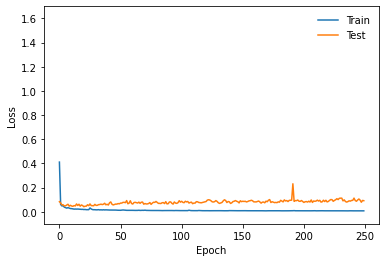

In [31]:
# plot train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(-0.1,1.7)
plt.legend(['Train', 'Test'], loc='upper right', frameon=False)
plt.savefig(image_path + 'Test Loss by Epochs.png')
plt.savefig(image_path + 'Test Loss by Epochs_Large2.pdf')
plt.show()
